In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def generate_22_symmetric_matrix(n):
    np.random.seed(103)
    random_matrices = np.random.rand(n, 2, 2)
    symmetric_matrices = 0.5 * (random_matrices + np.transpose(random_matrices, (0, 2, 1)))
    np.random.seed(103)
    diag_vals = np.random.uniform(low = 0.55, high = 0.9, size = 3)
    for i in range(n):
        np.fill_diagonal(symmetric_matrices[i], diag_vals)
    return symmetric_matrices



In [3]:
def simulated_edge_status(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix):
  # Initialize edge density list
    edge_status = []
    # Iterate over steps
    for step in range(num_steps):
        if step == 0:
            current_states = initial_states.copy()
            previous_states = current_states.copy()
            
            obtained_status = np.random.binomial(n=1, p=symmetric_matrices[step][previous_states[0], previous_states[1]])
            for i in range(num_nodes):
                current_states[i] = np.random.choice([0, 1], p=transition_matrix[previous_states[i]])
            edge_status.append(obtained_status)
        else:
            previous_states = current_states.copy()
            
            obtained_status = np.random.binomial(n=1, p=symmetric_matrices[step][previous_states[0], previous_states[1]])
            if step == num_steps-2:
                while obtained_status != 1:
                    obtained_status = np.random.binomial(n=1,
                                                         p=symmetric_matrices[step][previous_states[0], previous_states[1]])
            
            for i in range(num_nodes):
                current_states[i] = np.random.choice([0, 1], p=transition_matrix[previous_states[i]])
            edge_status.append(obtained_status)

    return edge_status[-2:]




In [4]:
num_steps = 3
num_nodes = 2
num_groups = 2

symmetric_matrices = generate_22_symmetric_matrix(num_steps)

# Transition matrix
transition_matrix = np.array([[0.6, 0.4], [0.4, 0.6]])
initial_states = np.random.choice([0, 1], size=num_nodes)



In [22]:
simulated_edge_status(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix)

[1, 1]

In [ ]:

all_statuses = []
num_simul = 1999900
for _ in range(num_simul):
    all_statuses.append(y_1_y_2_edge_status(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix))


all_statuses = np.array(all_statuses)

print("simul:", np.unique(all_statuses[:,1], return_counts=True)[1][1]/num_simul)
print("theo:", np.sum(np.matmul(np.matmul(transition_matrix, np.matmul(np.matmul(transition_matrix, symmetric_matrices[2]), transition_matrix) * symmetric_matrices[1]), transition_matrix))/np.sum(np.matmul(np.matmul(transition_matrix,symmetric_matrices[1]), transition_matrix)))

In [4]:
results = np.load('D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/conditional_distribution.npy')
print(results)

[[0.65789489 0.64923086]
 [0.48097698 0.4794817 ]
 [0.64822823 0.64892743]
 [0.54004605 0.53925661]
 [0.58036336 0.58083273]
 [0.50014414 0.50138221]
 [0.45388989 0.45688269]
 [0.45667367 0.46075835]
 [0.65856557 0.65877577]
 [0.52612713 0.52734864]
 [0.68004805 0.68031433]
 [0.54793393 0.54718541]
 [0.4913994  0.49249706]]


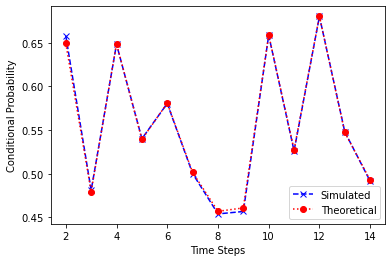

In [5]:
plt.plot(range(2,15), results[:,0], 'x--', label = "Simulated", color = "blue")
plt.plot(range(2,15), results[:,1], 'o:', label = "Theoretical", color = "red")
plt.xlabel("Time Steps")
plt.ylabel("Conditional Probability")
plt.legend()
plt.show()